In [1]:
# --- Бібліотеки для даної роботи ---
try:
    import numpy, matplotlib
    print("Бібліотеки вже встановлені. Пропускаємо інсталяцію.")
except ImportError:
    print("Встановлюємо бібліотеки...")
    %pip install numpy matplotlib

Бібліотеки вже встановлені. Пропускаємо інсталяцію.


## Задача 1. Робота з зображеннями як з матрицями

**Умова:**

Цифрові зображення у комп'ютері зберігаються як масиви чисел (матриці). Будь-яке чорно-біле зображення для комп'ютера — це просто матриця чисел, де кожне число — яскравість пікселя від 0 до 255. Редагування зображень базується на арифметичних операціях з цими матрицями.

Ви працюєте з фрагментом зображення розміром $3 \times 3$ пікселі.

Дано матрицю зображення $M$ та матрицю накладеного ефекту $E$:

$$
M = \begin{pmatrix}
100 & 150 & 200 \\
50 & 100 & 150 \\
0 & 50 & 100
\end{pmatrix}, \quad
E = \begin{pmatrix}
20 & 30 & 40 \\
10 & 20 & 30 \\
5 & 10 & 15
\end{pmatrix}
$$

Необхідно реалізувати три алгоритми обробки:
-  **Зміна контрасту.** Необхідно зменшити яскравість зображення $M$. Це множення матриці на скаляр (число) $\lambda$. Кожен елемент матриці множиться на це число **0.5**.
-  **Корекція яскравості.** Це додавання скаляра $c$ до матриці $M$. Число додається до *кожного* елемента матриці. Додайте до зображення $M$ число **25**.
-  **Змішування (Blending).** Ми створюємо нове зображення, змішуючи оригінал та ефект у певній пропорції. Для цього створи нове зображення як лінійну комбінацію: $0.8 \cdot M + 0.2 \cdot E$. Це імітує прозорість ефекту.

**Завдання:**
1.  Обчисліть це аналітично та покажіть проміжні кроки.
2.  Використовуючи бібліотеку `numpy`, напишіть програму, що виконує ті самі операції та перевіряє твої аналітичні обчислення. Виведіть на екран результати обчислень для кожного фільтра.

Красивий Вивід:


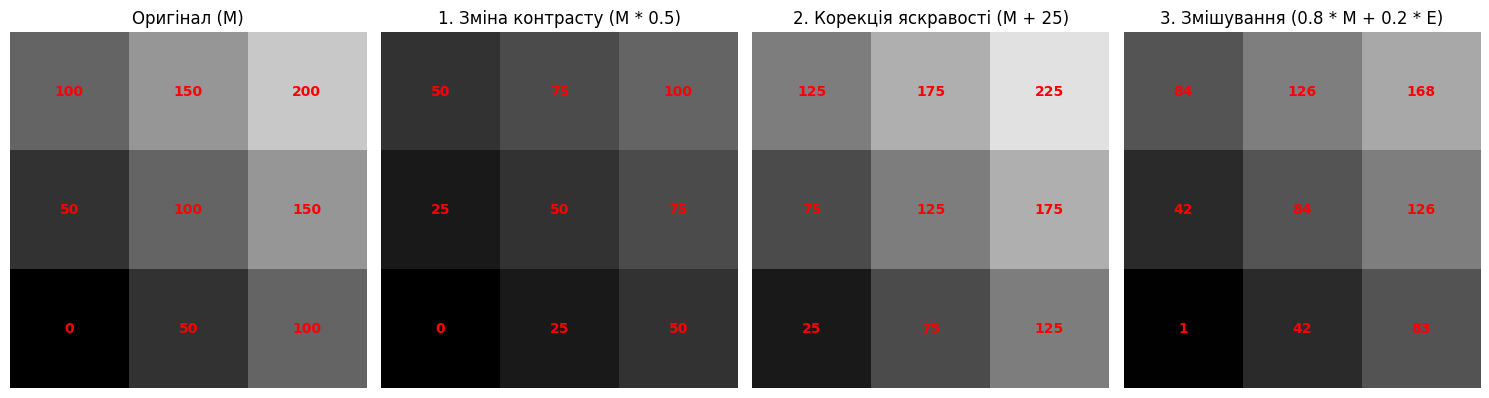

Технічний вивід:
Оригінал (M):
 [[100 150 200]
 [ 50 100 150]
 [  0  50 100]]

1. Зміна контрасту (M * 0.5):
 [[ 50.  75. 100.]
 [ 25.  50.  75.]
 [  0.  25.  50.]]

2. Корекція яскравості (M + 25):
 [[125 175 225]
 [ 75 125 175]
 [ 25  75 125]]

3. Змішування (0.8*M + 0.2*E):
 [[ 84. 126. 168.]
 [ 42.  84. 126.]
 [  1.  42.  83.]]


In [2]:
import numpy as np
import matplotlib.pyplot as plt

M = np.array([[100, 150, 200], [50, 100, 150], [0, 50, 100]])
E = np.array([[20, 30, 40], [10, 20, 30], [5, 10, 15]])

contrast_img = M * 0.5
bright_img = M + 25
blended_img = 0.8 * M + 0.2 * E

def plot_matrix(ax, matrix, title):
    ax.imshow(matrix, cmap='gray', vmin=0, vmax=255)
    ax.set_title(title)
    ax.axis('off')
    
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            ax.text(j, i, int(matrix[i, j]), 
                    ha="center", va="center", color="red", fontweight="bold")

fig, axes = plt.subplots(1, 4, figsize=(15, 4))

plot_matrix(axes[0], M, "Оригінал (M)")
plot_matrix(axes[1], contrast_img, "1. Зміна контрасту (M * 0.5)")
plot_matrix(axes[2], bright_img, "2. Корекція яскравості (M + 25)")
plot_matrix(axes[3], blended_img, "3. Змішування (0.8 * M + 0.2 * E)")

print("Красивий Вивід:")
plt.tight_layout()
plt.show()

print("Технічний вивід:")
print("Оригінал (M):\n", M)
print("\n1. Зміна контрасту (M * 0.5):\n", contrast_img)
print("\n2. Корекція яскравості (M + 25):\n", bright_img)
print("\n3. Змішування (0.8*M + 0.2*E):\n", blended_img)

## Аналітичний розв'язок (Ручні обчислення)

### 1. Зміна контрасту (Contrast)
**Формула:** $M_{new} = M \times 0.5$
Кожен піксель множиться на 0.5.

**Проміжні кроки:**
* Рядок 1: $100 \cdot 0.5 = 50$; $\quad 150 \cdot 0.5 = 75$; $\quad 200 \cdot 0.5 = 100$
* Рядок 2: $50 \cdot 0.5 = 25$; $\quad 100 \cdot 0.5 = 50$; $\quad 150 \cdot 0.5 = 75$
* Рядок 3: $0 \cdot 0.5 = 0$; $\quad 50 \cdot 0.5 = 25$; $\quad 100 \cdot 0.5 = 50$

**Результат:**
$$
\text{Contrast Matrix} = \begin{pmatrix}
50 & 75 & 100 \\
25 & 50 & 75 \\
0 & 25 & 50
\end{pmatrix}
$$

---

### 2. Корекція яскравості (Brightness)
**Формула:** $M_{new} = M + 25$
До кожного пікселя додається число 25.

**Проміжні кроки:**
* $100 + 25 = 125$
* $150 + 25 = 175$
* ... (і так для кожного елемента) ...
* $0 + 25 = 25$

**Результат:**
$$
\text{Brightness Matrix} = \begin{pmatrix}
125 & 175 & 225 \\
75 & 125 & 175 \\
25 & 75 & 125
\end{pmatrix}
$$

---

### 3. Змішування (Blending)
**Формула:** $Blend = 0.8 \cdot M + 0.2 \cdot E$

**Крок 1. Обчислення часток:**
* $0.8 \cdot M = \begin{pmatrix} 80 & 120 & 160 \\ 40 & 80 & 120 \\ 0 & 40 & 80 \end{pmatrix}$
* $0.2 \cdot E = \begin{pmatrix} 4 & 6 & 8 \\ 2 & 4 & 6 \\ 1 & 2 & 3 \end{pmatrix}$ (наприклад: $20 \cdot 0.2 = 4$)

**Крок 2. Додавання (поелементно):**
* Елемент (0,0): $80 + 4 = 84$
* Елемент (0,1): $120 + 6 = 126$
* Елемент (1,1): $80 + 4 = 84$

**Результат:**
$$
\text{Blended Matrix} = \begin{pmatrix}
84 & 126 & 168 \\
42 & 84 & 126 \\
1 & 42 & 83
\end{pmatrix}
$$